21:46:21 - cmdstanpy - INFO - Chain [1] start processing
21:46:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\2356880889.py:61: UserWarning: FigureCanvasAgg is non-int

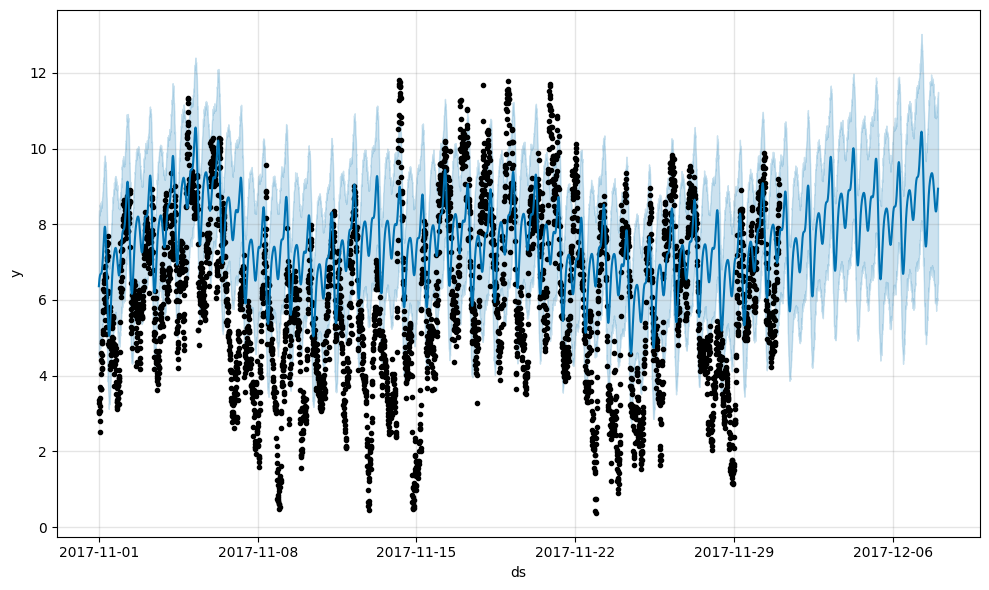

In [21]:
import pandas as pd
from prophet import Prophet

# Step 1: Load and preprocess the dataset
# Load the dataset assuming it's in a CSV file called 'wind_speed_data.csv'
df = pd.read_csv('../excels/nov-wind-ftr.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
# Prophet requires the columns 'ds' for datetime and 'y' for the target variable
# Add additional regressors (features)
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates
future = prophet_model.make_future_dataframe(periods=6*24*7, freq='10min')  # predicting for the next 7 days

# Add the same regressors to the future dataframe
# Since we are predicting for the future, we can use the last known values of the regressors or fill them with some strategy
future['100m_N_Std'] = df['100m_N_Std'].iloc[-1]
future['Pressure'] = df['Pressure'].iloc[-1]
future['WV_98m'] = df['WV_98m'].iloc[-1]
future['WV_78m'] = df['WV_78m'].iloc[-1]
future['WV_48m'] = df['WV_48m'].iloc[-1]
future['Temp_5m'] = df['Temp_5m'].iloc[-1]
future['Hum_5m'] = df['Hum_5m'].iloc[-1]

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
fig.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:39:11 - cmdstanpy - INFO - Chain [1] start processing
11:39:24 - cmdstanpy - INFO - Chain [1] done processing


                      ds      yhat  yhat_lower  yhat_upper
5323 2017-12-07 23:10:00  8.692112    6.112551   11.175055
5324 2017-12-07 23:20:00  8.755219    5.999664   11.345358
5325 2017-12-07 23:30:00  8.818435    5.980953   11.350367
5326 2017-12-07 23:40:00  8.880420    6.244082   11.498908
5327 2017-12-07 23:50:00  8.939909    6.277731   11.581712


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


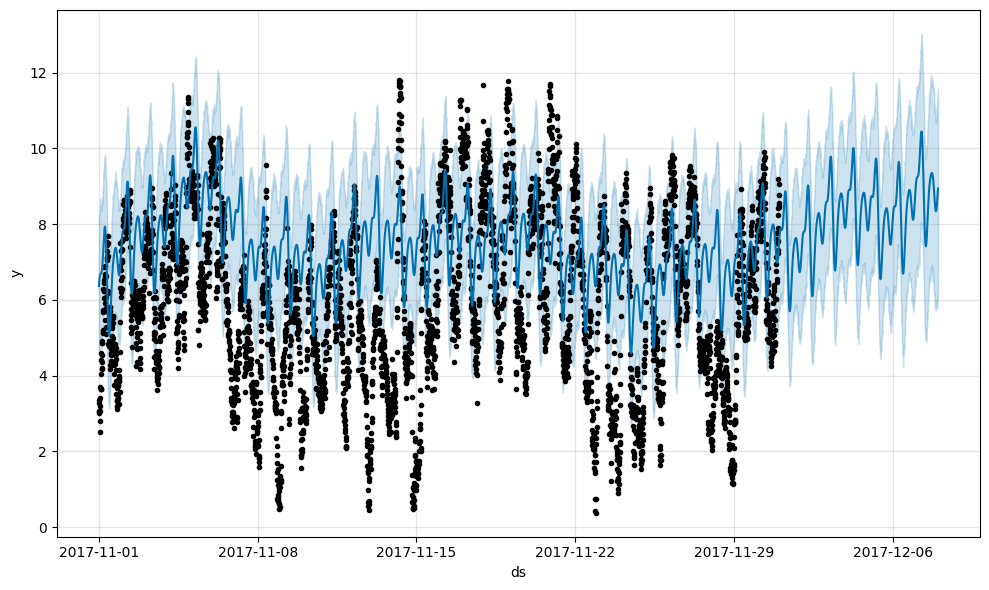

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/nov-wind-ftr.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
future = prophet_model.make_future_dataframe(periods=6*24*7, freq='10min')  # predicting for the next 7 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


12:11:31 - cmdstanpy - INFO - Chain [1] start processing
12:11:45 - cmdstanpy - INFO - Chain [1] done processing


                      ds       yhat  yhat_lower  yhat_upper
8635 2017-12-30 23:10:00  13.358263   -4.331490   29.825438
8636 2017-12-30 23:20:00  13.429720   -4.274212   30.882474
8637 2017-12-30 23:30:00  13.501274   -3.968448   30.057055
8638 2017-12-30 23:40:00  13.571581   -4.646329   30.129550
8639 2017-12-30 23:50:00  13.639377   -4.319709   30.445867


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


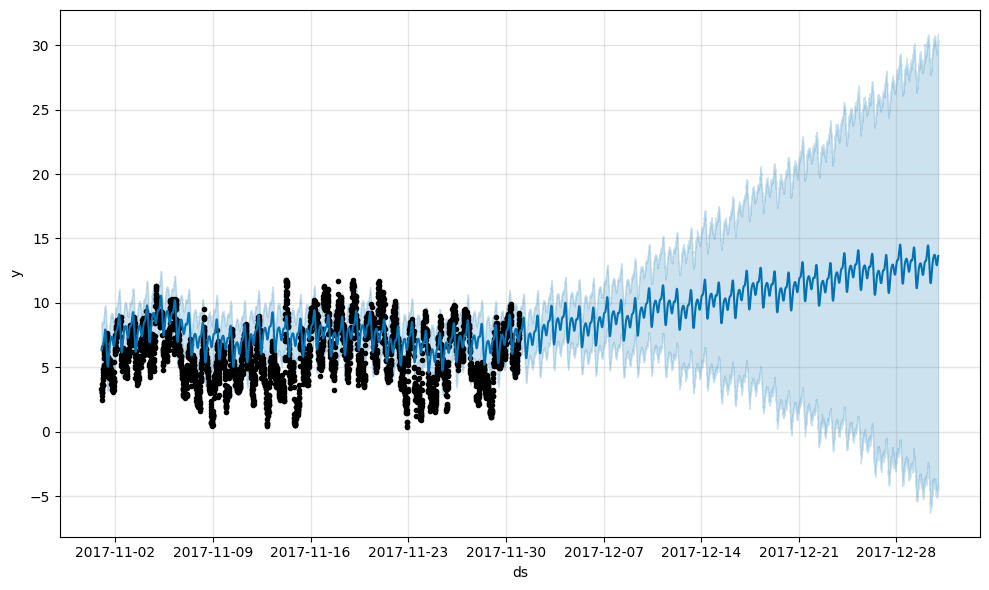

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/nov-wind-ftr.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv('../excels/2017-2018-raw.csv',encoding='latin1')

df['Date/Time'] = pd.to_datetime(df['Date/Time'])


# Convert the 'Date/Time' column to datetime
# df['Date/Time'] = pd.to_datetime(df['Date/Time'])
#, format='%d-%m-%Y %H:%M'
# Set 'Date/Time' as the index (optional, but useful for time series data)
df.set_index('Date/Time', inplace=True)

missing_before = df['100m_N Avg [m/s]'].isnull().sum()
missing_before_std = df['100m_N Std [m/s]'].isnull().sum()
missing_before_pr = df['Pressure [mbar]'].isnull().sum()
missing_before_98 = df['98m WV [°]'].isnull().sum()
missing_before_78 = df['78m WV [°]'].isnull().sum()
missing_before_48 = df['48m WV [°]'].isnull().sum()
missing_before_tmp = df['Temp 5m [°C]'].isnull().sum()
missing_before_hum = df['Hum 5m [%]'].isnull().sum()

# Interpolate missing values
df['100m_N Avg [m/s]'] = df['100m_N Avg [m/s]'].interpolate(method='linear')
df['100m_N Std [m/s]'] = df['100m_N Std [m/s]'].interpolate(method='linear')
df['Pressure [mbar]'] = df['Pressure [mbar]'].interpolate(method='linear')
df['98m WV [°]'] = df['98m WV [°]'].interpolate(method='linear')
df['78m WV [°]'] = df['78m WV [°]'].interpolate(method='linear')
df['48m WV [°]'] = df['48m WV [°]'].interpolate(method='linear')
df['Temp 5m [°C]'] = df['Temp 5m [°C]'].interpolate(method='linear')
df['Hum 5m [%]'] = df['Hum 5m [%]'].interpolate(method='linear')
# df.to_csv('north_changed.csv')

# Count missing values after interpolation
missing_after = df['100m_N Avg [m/s]'].isnull().sum()
missing_after_std = df['100m_N Std [m/s]'].isnull().sum()
missing_after_pr = df['Pressure [mbar]'].isnull().sum()
missing_after_98 = df['98m WV [°]'].isnull().sum()
missing_after_78 = df['78m WV [°]'].isnull().sum()
missing_after_48 = df['48m WV [°]'].isnull().sum()
missing_after_tmp = df['Temp 5m [°C]'].isnull().sum()
missing_after_hum = df['Hum 5m [%]'].isnull().sum()
# Calculate the number of rows affected
row_affected = missing_before - missing_after
row_affected_std = missing_before_std - missing_after_std
row_affected_pr = missing_before_pr - missing_after_pr
row_affected_98 = missing_before_98 - missing_after_98
row_affected_78 = missing_before_78 - missing_after_78
row_affected_48 = missing_before_48 - missing_after_48
row_affected_tmp = missing_before_tmp - missing_after_tmp
row_affected_hum = missing_before_hum - missing_after_hum

print(df['100m_N Avg [m/s]'])
df_reset = df.reset_index()
new_column = ['Date/Time','100m_N Avg [m/s]','100m_N Std [m/s]','Pressure [mbar]','98m WV [°]','78m WV [°]','48m WV [°]','Temp 5m [°C]','Hum 5m [%]']

new_data = df_reset[new_column].reset_index()

new_data.to_csv('../excels/2017-2018-clean.csv',index=False)

print(f'Number of rows affected by interpolation: {row_affected}')
print(f'Number of rows affected by interpolation: {row_affected_std}')
print(f'Number of rows affected by interpolation: {row_affected_pr}')
print(f'Number of rows affected by interpolation: {row_affected_98}')
print(f'Number of rows affected by interpolation: {row_affected_78}')
print(f'Number of rows affected by interpolation: {row_affected_48}')
print(f'Number of rows affected by interpolation: {row_affected_tmp}')
print(f'Number of rows affected by interpolation: {row_affected_hum}')

Date/Time
2017-11-01 00:00:00     3.285
2017-11-01 00:10:00     3.017
2017-11-01 00:20:00     3.066
2017-11-01 00:30:00     3.351
2017-11-01 00:40:00     3.039
                        ...  
2018-11-30 23:10:00     9.789
2018-11-30 23:20:00    10.054
2018-11-30 23:30:00    10.305
2018-11-30 23:40:00    10.565
2018-11-30 23:50:00    10.509
Name: 100m_N Avg [m/s], Length: 56880, dtype: float64
Number of rows affected by interpolation: 1442
Number of rows affected by interpolation: 1442
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288


12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    2.878703    8.839664
61196 2018-12-30 23:20:00  5.859773    2.840780    8.440958
61197 2018-12-30 23:30:00  5.849498    2.848529    8.676229
61198 2018-12-30 23:40:00  5.837875    3.078686    8.636710
61199 2018-12-30 23:50:00  5.824470    2.882269    8.493780


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


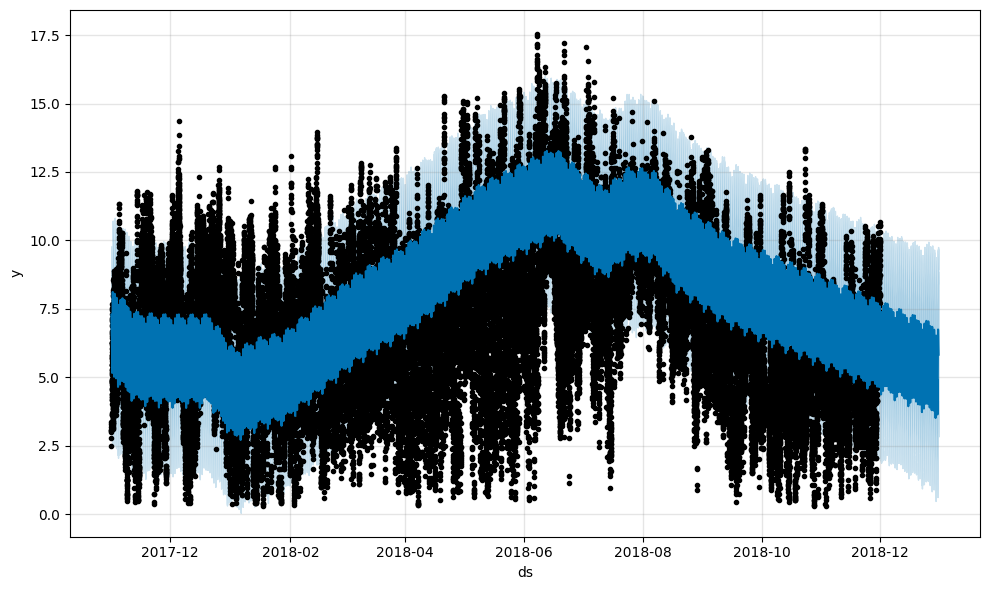

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [6]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Plotly
fig = go.Figure()

# Add the actual data points
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual'))

# Add the forecasted data points
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Add the confidence intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', fill=None,
    line_color='lightgrey', name='Upper CI'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', fill='tonexty',
    fillcolor='rgba(68, 68, 68, 0.3)', line_color='lightgrey', name='Lower CI'
))

# Add dropdown to filter by month
months = pd.date_range(start='2018-01-01', end='2018-12-01', freq='MS').strftime("%B-%Y").tolist()
month_values = pd.date_range(start='2018-01-01', end='2018-12-01', freq='MS').strftime("%Y-%m").tolist()

dropdown_buttons = [
    {'label': 'All Data', 'method': 'update', 'args': [{'visible': [True, True, True, True]}, {'title': 'All Data'}]}
]

for month, month_value in zip(months, month_values):
    visible = [False] * len(fig.data)
    indices = forecast['ds'].dt.strftime("%Y-%m") == month_value
    visible[0] = (df['ds'].dt.strftime("%Y-%m") == month_value).any()  # Actual data
    visible[1] = indices.any()  # Forecast
    visible[2] = indices.any()  # Upper CI
    visible[3] = indices.any()  # Lower CI
    dropdown_buttons.append(
        {'label': month, 'method': 'update', 'args': [{'visible': visible}, {'title': month}]}
    )

fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)'
)

fig.show()


14:30:20 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

In [ ]:
pip install nbformat

In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Plotly
fig = go.Figure()

# Add the actual data points
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual'))

# Add the forecasted data points
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Add the confidence intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', fill=None,
    line_color='lightgrey', name='Upper CI'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', fill='tonexty',
    fillcolor='rgba(68, 68, 68, 0.3)', line_color='lightgrey', name='Lower CI'
))

# Add dropdown to filter by month
months = pd.date_range(start='2018-01-01', end='2018-12-01', freq='MS').strftime("%B-%Y").tolist()
month_values = pd.date_range(start='2018-01-01', end='2018-12-01', freq='MS').strftime("%Y-%m").tolist()

dropdown_buttons = [
    {'label': 'All Data', 'method': 'update', 'args': [{'visible': [True, True, True, True]}, {'title': 'All Data'}]}
]

for month, month_value in zip(months, month_values):
    visible = [False] * len(fig.data)
    indices = forecast['ds'].dt.strftime("%Y-%m") == month_value
    visible[0] = (df['ds'].dt.strftime("%Y-%m") == month_value).any()  # Actual data
    visible[1] = indices.any()  # Forecast
    visible[2] = indices.any()  # Upper CI
    visible[3] = indices.any()  # Lower CI
    dropdown_buttons.append(
        {'label': month, 'method': 'update', 'args': [{'visible': visible}, {'title': month}]}
    )

fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)'
)

fig.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000191FD2154D0>>
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1494, in enumerate
    def enumerate():
    
KeyboardInterrupt: 
16:14:58 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

In [3]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
import plotly.offline as py

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Plotly
fig = go.Figure()

# Add the actual data points
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual'))

# Add the forecasted data points
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Add the confidence intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', fill=None,
    line_color='lightgrey', name='Upper CI'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', fill='tonexty',
    fillcolor='rgba(68, 68, 68, 0.3)', line_color='lightgrey', name='Lower CI'
))

# Add dropdown to filter by month
months = pd.date_range(start='2017-11-01', end='2018-11-01', freq='MS').strftime("%B-%Y").tolist()
month_values = pd.date_range(start='2017-11-01', end='2018-11-01', freq='MS').strftime("%Y-%m").tolist()

dropdown_buttons = [
    {'label': 'All Data', 'method': 'update', 'args': [{'visible': [True, True, True, True]}, {'title': 'All Data'}]}
]

for month, month_value in zip(months, month_values):
    visible = [False] * len(fig.data)
    indices = forecast['ds'].dt.strftime("%Y-%m") == month_value
    visible[0] = (df['ds'].dt.strftime("%Y-%m") == month_value).any()  # Actual data
    visible[1] = indices.any()  # Forecast
    visible[2] = indices.any()  # Upper CI
    visible[3] = indices.any()  # Lower CI
    dropdown_buttons.append(
        {'label': month, 'method': 'update', 'args': [{'visible': visible}, {'title': month}]}
    )

fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)'
)

# Render the plot in a web browser
py.plot(fig, filename='wind_speed_forecast.html')


16:16:19 - cmdstanpy - INFO - Chain [1] start processing
16:21:52 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    2.865718    8.688448
61196 2018-12-30 23:20:00  5.859773    2.746019    8.721498
61197 2018-12-30 23:30:00  5.849498    2.909867    8.849691
61198 2018-12-30 23:40:00  5.837875    2.999065    8.615224
61199 2018-12-30 23:50:00  5.824470    2.734732    8.567873


'wind_speed_forecast.html'

16:28:46 - cmdstanpy - INFO - Chain [1] start processing
16:32:41 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    3.250443    8.719281
61196 2018-12-30 23:20:00  5.859773    2.946530    8.785993
61197 2018-12-30 23:30:00  5.849498    3.272485    8.844052
61198 2018-12-30 23:40:00  5.837875    2.965732    8.745135
61199 2018-12-30 23:50:00  5.824470    2.870526    8.582776


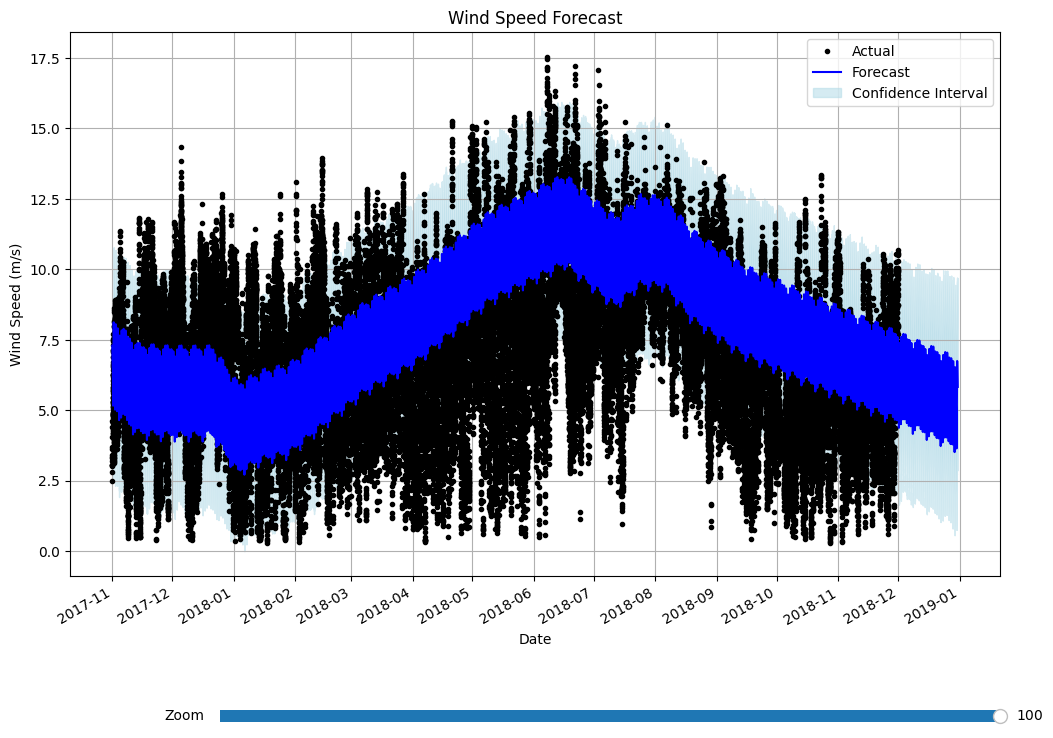

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot actual data points
ax.plot(df['ds'], df['y'], 'k.', label='Actual')

# Plot forecasted data points
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot confidence intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

# Format the plot
ax.set_title('Wind Speed Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.legend()
ax.grid(True)

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

# Add interactive elements
ax_zoom = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_zoom = Slider(ax_zoom, 'Zoom', 1, 100, valinit=100, valstep=1)

def update(val):
    zoom = slider_zoom.val
    ax.set_xlim([df['ds'].min(), df['ds'].max() + pd.Timedelta(days=30)/zoom])
    fig.canvas.draw_idle()

slider_zoom.on_changed(update)

# Show the plot
plt.show()
